Training RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training SVR...
Best parameters for SVR: {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}
RandomForest Mean Squared Error: 120.9476313642775
RandomForest R^2 Score: 0.650693216385736


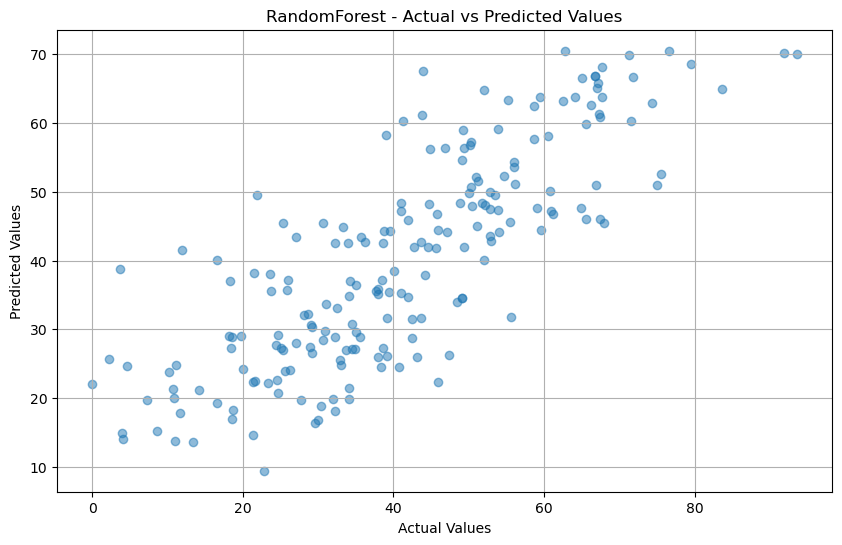

GradientBoosting Mean Squared Error: 121.8928532828228
GradientBoosting R^2 Score: 0.6479633371442456


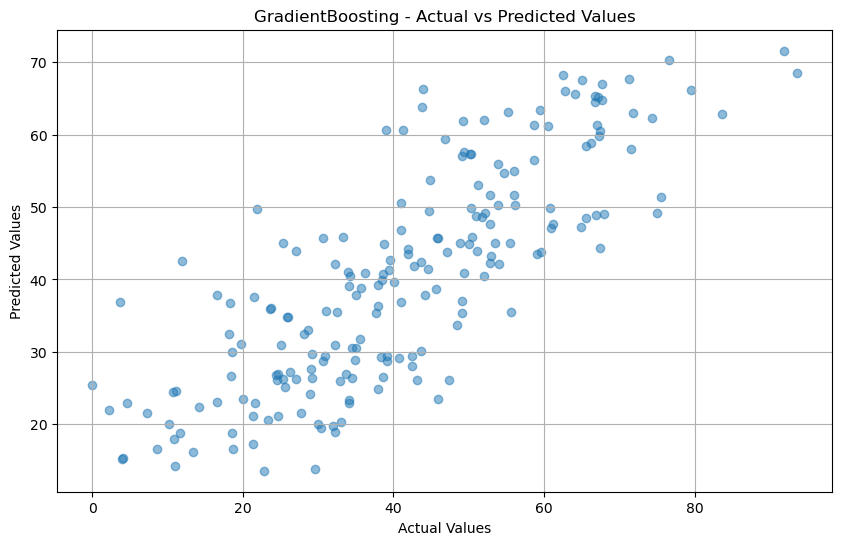

SVR Mean Squared Error: 111.97298934195187
SVR R^2 Score: 0.6766127263715584


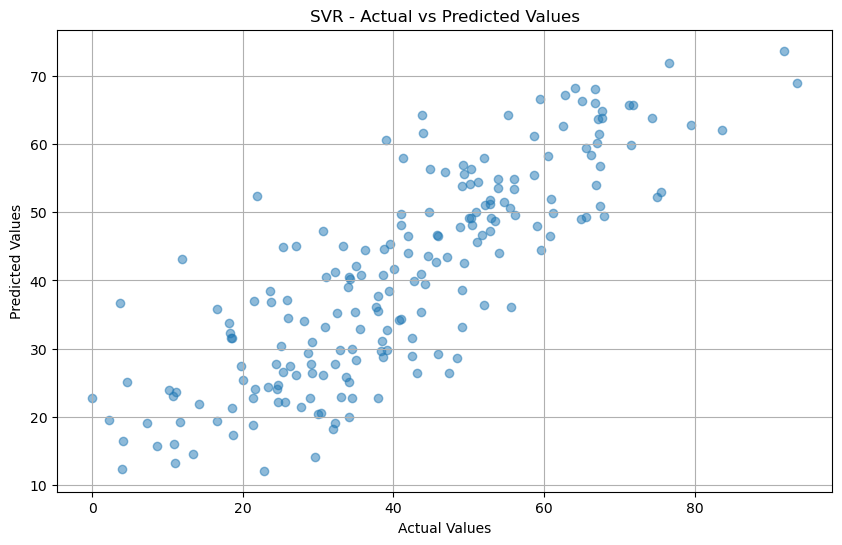

Model Performance Summary:
                         MSE        R2
RandomForest      120.947631  0.650693
GradientBoosting  121.892853  0.647963
SVR               111.972989  0.676613


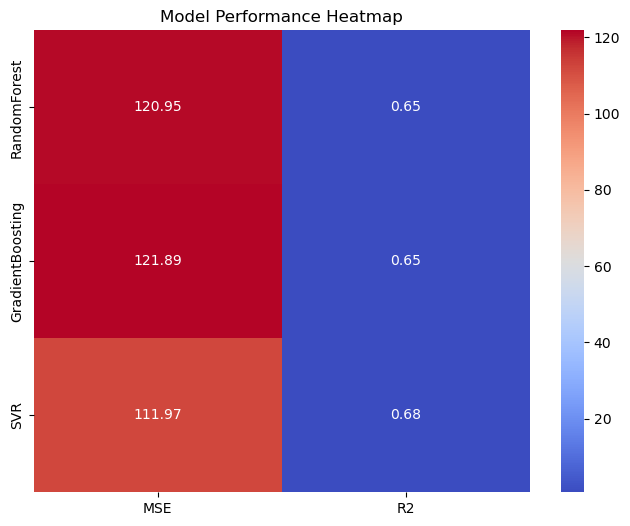

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
n_features = 5

# Create synthetic features
X_synthetic = np.random.rand(n_samples, n_features) * 100  # Features: e.g., rainfall, temperature
# Create synthetic target variable
y_synthetic = (X_synthetic[:, 0] * 0.5 + X_synthetic[:, 1] * 0.3 + np.random.randn(n_samples) * 10).clip(0, 100)  # Target: e.g., river flow

# Create DataFrame
feature_names = [f'feature_{i}' for i in range(n_features)]
data_synthetic = pd.DataFrame(X_synthetic, columns=feature_names)
data_synthetic['target'] = y_synthetic

# Split the data into training and testing sets
X = data_synthetic.drop('target', axis=1)
y = data_synthetic['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10, 100],
        'epsilon': [0.1, 0.2, 0.5]
    }
}

# Train models with hyperparameter tuning
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R^2 Score: {r2}")

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

# Summary of results
results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
print(results_df)

# Heatmap of results
plt.figure(figsize=(8, 6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Model Performance Heatmap')
plt.show()


In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
n_samples = 1000
n_features = 7

# Create synthetic features (e.g., rainfall, temperature, humidity, etc.)
# Generating random data for demonstration
X_synthetic = np.random.rand(n_samples, n_features) * 100  # Features: e.g., rainfall, temperature, humidity

# Create synthetic target variable (e.g., river flow)
# Assuming a simple linear combination of features plus some noise
y_synthetic = (X_synthetic[:, 0] * 0.4 + X_synthetic[:, 1] * 0.3 + X_synthetic[:, 2] * 0.2 +
               X_synthetic[:, 3] * 0.1 + np.random.randn(n_samples) * 5).clip(0, 100)  # Target: river flow

# Create DataFrame
feature_names = [f'feature_{i}' for i in range(n_features)]
data_synthetic = pd.DataFrame(X_synthetic, columns=feature_names)
data_synthetic['target'] = y_synthetic

# Display the first few rows of the dataset
print(data_synthetic.head())

# Optionally, save the synthetic dataset to a CSV file
data_synthetic.to_csv('synthetic_hydrological_data.csv', index=False)


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  37.454012  95.071431  73.199394  59.865848  15.601864  15.599452   
1  86.617615  60.111501  70.807258   2.058449  96.990985  83.244264   
2  18.182497  18.340451  30.424224  52.475643  43.194502  29.122914   
3  13.949386  29.214465  36.636184  45.606998  78.517596  19.967378   
4  59.241457   4.645041  60.754485  17.052412   6.505159  94.888554   

   feature_6     target  
0   5.808361  66.652407  
1  21.233911  70.180484  
2  61.185289  17.909732  
3  51.423444  18.717678  
4  96.563203  35.216523  
